In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
train_data=pd.read_excel(r"C:\Users\Techkno\Desktop\ML_Project\Data_Train_airfare.xlsx")
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
train_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data.isnull().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route               True
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops         True
Additional_Info    False
Price              False
dtype: bool

In [8]:
train_data.dropna(inplace=True)

In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
train_data['Date_of_Journey']=pd.to_datetime(train_data['Date_of_Journey'])

C:\Users\Techkno\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Techkno\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Techkno\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Techkno\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/04/2019' in DD/MM/YYYY format. Provide format o

In [11]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [12]:
train_data['day_of_Journey']=train_data['Date_of_Journey'].dt.day
train_data['month_of_Journey']=train_data['Date_of_Journey'].dt.month

In [13]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_Journey,month_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [14]:
train_data.drop('Date_of_Journey', axis=1, inplace=True)

In [15]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_Journey,month_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [16]:
train_data['Dep_Time']=pd.to_datetime(train_data['Dep_Time'])
train_data['Arrival_Time']=pd.to_datetime(train_data['Arrival_Time'])

In [17]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_Journey,month_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-05-17 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-05-17 05:50:00,2023-05-17 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-05-17 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2023-05-17 18:05:00,2023-05-17 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2023-05-17 16:50:00,2023-05-17 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Airline           10682 non-null  object        
 1   Source            10682 non-null  object        
 2   Destination       10682 non-null  object        
 3   Route             10682 non-null  object        
 4   Dep_Time          10682 non-null  datetime64[ns]
 5   Arrival_Time      10682 non-null  datetime64[ns]
 6   Duration          10682 non-null  object        
 7   Total_Stops       10682 non-null  object        
 8   Additional_Info   10682 non-null  object        
 9   Price             10682 non-null  int64         
 10  day_of_Journey    10682 non-null  int64         
 11  month_of_Journey  10682 non-null  int64         
dtypes: datetime64[ns](2), int64(3), object(7)
memory usage: 1.1+ MB


In [19]:
train_data['Dep_time_hr']=train_data['Dep_Time'].dt.hour
train_data['Dep_time_minute']=train_data['Dep_Time'].dt.minute
train_data['Arr_time_hr']=train_data['Arrival_Time'].dt.hour
train_data['Arr_time_']=train_data['Arrival_Time'].dt.minute


In [20]:
train_data.drop(['Dep_Time', 'Arrival_Time'], axis=1, inplace=True)

In [21]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_Journey,month_of_Journey,Dep_time_hr,Dep_time_minute,Arr_time_hr,Arr_time_
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [22]:
def duration_preprocess(value):
    lst=value.split()
    if(len(lst)==2):
        return value
    else:
        if 'h' in value:
            return value+' 0m'
        else:
            return '0h '+value

In [23]:
train_data['Duration']=train_data['Duration'].apply(duration_preprocess)

In [24]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_Journey,month_of_Journey,Dep_time_hr,Dep_time_minute,Arr_time_hr,Arr_time_
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [25]:
train_data['duration_hours']=train_data['Duration'].apply(lambda x:float(x.split()[0][:-1]))
train_data['duration_minutes']=train_data['Duration'].apply(lambda x:float(x.split()[1][:-1]))

In [26]:
train_data['duration_hours']

0         2.0
1         7.0
2        19.0
3         5.0
4         4.0
         ... 
10678     2.0
10679     2.0
10680     3.0
10681     2.0
10682     8.0
Name: duration_hours, Length: 10682, dtype: float64

In [27]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_Journey,month_of_Journey,Dep_time_hr,Dep_time_minute,Arr_time_hr,Arr_time_,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2.0,50.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7.0,25.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19.0,0.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5.0,25.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4.0,45.0


In [28]:
train_data.drop('Duration', axis=1, inplace=True)

In [29]:
train_data.select_dtypes(['object']).columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [30]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [31]:
train_data['Total_Stops']=train_data['Total_Stops'].map({'non-stop':0,'1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4})

In [32]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,day_of_Journey,month_of_Journey,Dep_time_hr,Dep_time_minute,Arr_time_hr,Arr_time_,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2.0,50.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,5,1,5,50,13,15,7.0,25.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,6,9,9,25,4,25,19.0,0.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,5,12,18,5,23,30,5.0,25.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,3,1,16,50,21,35,4.0,45.0


In [33]:
train_data.drop('Additional_Info',axis=1, inplace=True)

In [34]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Price,day_of_Journey,month_of_Journey,Dep_time_hr,Dep_time_minute,Arr_time_hr,Arr_time_,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,3897,24,3,22,20,1,10,2.0,50.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662,5,1,5,50,13,15,7.0,25.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,13882,6,9,9,25,4,25,19.0,0.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,6218,5,12,18,5,23,30,5.0,25.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,13302,3,1,16,50,21,35,4.0,45.0


In [35]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

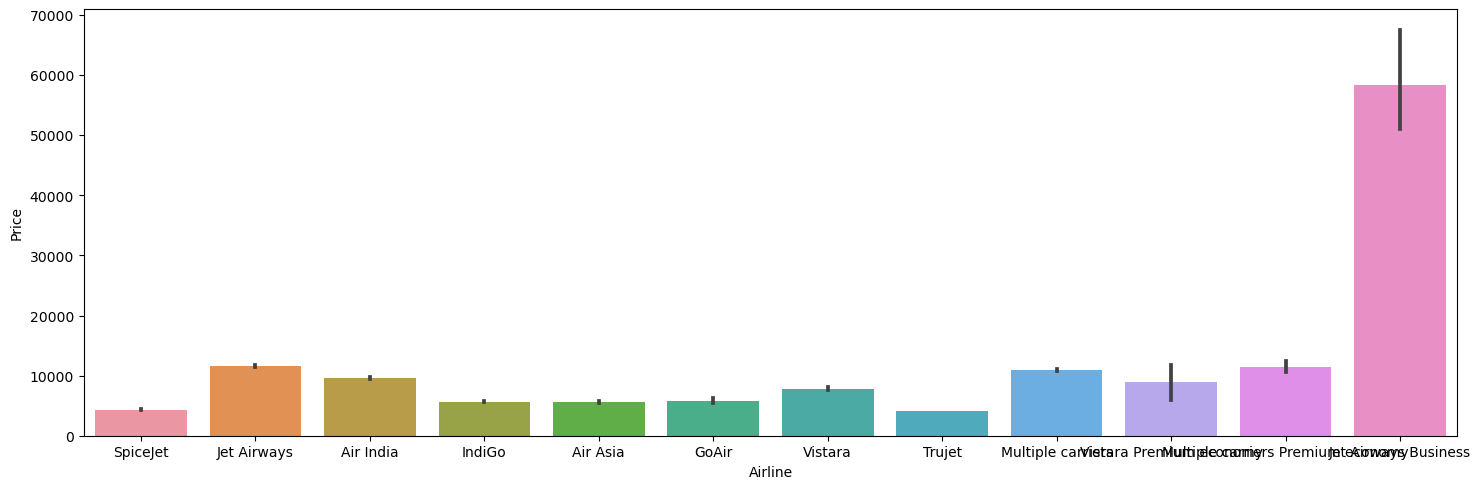

In [36]:
plt.figure(figsize=(15,5))
sns.barplot(x='Airline', y='Price', data=train_data.sort_values('Price', ascending=True))
plt.tight_layout()

In [37]:
train_data.groupby('Airline').describe()['Price'].sort_values('mean', ascending=True)

,count,mean,std,min,25%,50%,75%,max
Airline,,,,,,,,
Trujet,1.0,4140.000000,NaN,4140.0,4140.0,4140.0,4140.00,4140.0
SpiceJet,818.0,4338.284841,1849.922514,1759.0,3574.5,3873.0,4760.00,23267.0
Air Asia,319.0,5590.260188,2027.362290,3383.0,4282.0,5162.0,6451.00,13774.0
IndiGo,2053.0,5673.682903,2264.142168,2227.0,4226.0,5000.0,6494.00,22153.0
GoAir,194.0,5861.056701,2703.585767,3398.0,3898.0,5135.0,6811.25,22794.0
Vistara,479.0,7796.348643,2914.298578,3687.0,5403.0,7980.0,9345.00,21730.0
Vistara Premium economy,3.0,8962.333333,2915.405518,5969.0,7547.0,9125.0,10459.00,11793.0
Air India,1751.0,9612.427756,3901.734561,2050.0,6891.0,9443.0,12219.00,31945.0
Multiple carriers,1196.0,10902.678094,3721.234997,5797.0,7723.0,10197.0,13587.00,36983.0


In [38]:
Airline= pd.get_dummies(train_data['Airline'], drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [39]:
train_data=pd.concat([train_data, Airline], axis=1)
train_data

,Airline,Source,Destination,Route,Total_Stops,Price,day_of_Journey,month_of_Journey,Dep_time_hr,Dep_time_minute,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,3897,24,3,22,20,...,0,1,0,0,0,0,0,0,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662,5,1,5,50,...,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,13882,6,9,9,25,...,0,0,1,0,0,0,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,6218,5,12,18,5,...,0,1,0,0,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,13302,3,1,16,50,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,0,4107,4,9,19,55,...,0,0,0,0,0,0,0,0,0,0
10679,Air India,Kolkata,Banglore,CCU → BLR,0,4145,27,4,20,45,...,0,0,0,0,0,0,0,0,0,0
10680,Jet Airways,Banglore,Delhi,BLR → DEL,0,7229,27,4,8,20,...,0,0,1,0,0,0,0,0,0,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,0,12648,3,1,11,30,...,0,0,0,0,0,0,0,0,1,0


In [40]:
train_data.drop('Airline', axis=1, inplace=True)

In [41]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [42]:
train_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [43]:
train_data=pd.get_dummies(data=train_data, columns=['Source', 'Destination'], drop_first=True)
train_data.head()

,Route,Total_Stops,Price,day_of_Journey,month_of_Journey,Dep_time_hr,Dep_time_minute,Arr_time_hr,Arr_time_,duration_hours,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,0,3897,24,3,22,20,1,10,2.0,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,2,7662,5,1,5,50,13,15,7.0,...,0,0,0,1,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,2,13882,6,9,9,25,4,25,19.0,...,0,0,1,0,0,1,0,0,0,0
3,CCU → NAG → BLR,1,6218,5,12,18,5,23,30,5.0,...,0,0,0,1,0,0,0,0,0,0
4,BLR → NAG → DEL,1,13302,3,1,16,50,21,35,4.0,...,0,0,0,0,0,0,0,0,0,1


In [44]:
train_data.select_dtypes(['object']).columns

Index(['Route'], dtype='object')

In [45]:
train_data['durations_hours']=train_data['duration_hours'].astype(str).astype(float)

In [46]:
train_data.dtypes

Route                                 object
Total_Stops                            int64
Price                                  int64
day_of_Journey                         int64
month_of_Journey                       int64
Dep_time_hr                            int64
Dep_time_minute                        int64
Arr_time_hr                            int64
Arr_time_                              int64
duration_hours                       float64
duration_minutes                     float64
Air India                              uint8
GoAir                                  uint8
IndiGo                                 uint8
Jet Airways                            uint8
Jet Airways Business                   uint8
Multiple carriers                      uint8
Multiple carriers Premium economy      uint8
SpiceJet                               uint8
Trujet                                 uint8
Vistara                                uint8
Vistara Premium economy                uint8
Source_Che

In [47]:
route=train_data.select_dtypes(['object'])
route.head()

,Route
0,BLR → DEL
1,CCU → IXR → BBI → BLR
2,DEL → LKO → BOM → COK
3,CCU → NAG → BLR
4,BLR → NAG → DEL


In [48]:
route['Route_1']=route['Route'].str.split('→').str[0]
route['Route_2']=route['Route'].str.split('→').str[1]
route['Route_3']=route['Route'].str.split('→').str[2]
route['Route_4']=route['Route'].str.split('→').str[3]
route['Route_5']=route['Route'].str.split('→').str[4]

In [49]:
route.head()

,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,BLR,DEL,NaN,NaN,NaN
1,CCU → IXR → BBI → BLR,CCU,IXR,BBI,BLR,NaN
2,DEL → LKO → BOM → COK,DEL,LKO,BOM,COK,NaN
3,CCU → NAG → BLR,CCU,NAG,BLR,NaN,NaN
4,BLR → NAG → DEL,BLR,NAG,DEL,NaN,NaN


In [50]:
route.fillna('None', inplace=True)
route.head()

,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,BLR,DEL,None,None,None
1,CCU → IXR → BBI → BLR,CCU,IXR,BBI,BLR,None
2,DEL → LKO → BOM → COK,DEL,LKO,BOM,COK,None
3,CCU → NAG → BLR,CCU,NAG,BLR,None,None
4,BLR → NAG → DEL,BLR,NAG,DEL,None,None


In [53]:
for i  in range(1,6):
    col= 'Route_'+str(i)
    val=route[col].nunique()
    print(f'Number of Categories in {col} is: {val}')

Number of Categories in Route_1 is: 5
Number of Categories in Route_2 is: 45
Number of Categories in Route_3 is: 30
Number of Categories in Route_4 is: 14
Number of Categories in Route_5 is: 6


In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
label_encoder=LabelEncoder()

In [58]:
for i in range(1,6):
    col='Route_'+str(i)
    route[col]=label_encoder.fit_transform(route[col])

In [59]:
route.head()

,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,0,13,29,13,5
1,CCU → IXR → BBI → BLR,2,25,1,3,5
2,DEL → LKO → BOM → COK,3,32,4,5,5
3,CCU → NAG → BLR,2,34,3,13,5
4,BLR → NAG → DEL,0,34,8,13,5


In [60]:
route.drop('Route', inplace=True, axis=1)

In [61]:
train_data=pd.concat([train_data, route], axis=1)
train_data.head()

,Route,Total_Stops,Price,day_of_Journey,month_of_Journey,Dep_time_hr,Dep_time_minute,Arr_time_hr,Arr_time_,duration_hours,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,durations_hours,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,0,3897,24,3,22,20,1,10,2.0,...,0,0,0,1,2.0,0,13,29,13,5
1,CCU → IXR → BBI → BLR,2,7662,5,1,5,50,13,15,7.0,...,0,0,0,0,7.0,2,25,1,3,5
2,DEL → LKO → BOM → COK,2,13882,6,9,9,25,4,25,19.0,...,0,0,0,0,19.0,3,32,4,5,5
3,CCU → NAG → BLR,1,6218,5,12,18,5,23,30,5.0,...,0,0,0,0,5.0,2,34,3,13,5
4,BLR → NAG → DEL,1,13302,3,1,16,50,21,35,4.0,...,0,0,0,1,4.0,0,34,8,13,5


In [62]:
train_data.drop('Route', inplace=True, axis=1)
train_data.head(2)

,Total_Stops,Price,day_of_Journey,month_of_Journey,Dep_time_hr,Dep_time_minute,Arr_time_hr,Arr_time_,duration_hours,duration_minutes,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,durations_hours,Route_1,Route_2,Route_3,Route_4,Route_5
0,0,3897,24,3,22,20,1,10,2.0,50.0,...,0,0,0,1,2.0,0,13,29,13,5
1,2,7662,5,1,5,50,13,15,7.0,25.0,...,0,0,0,0,7.0,2,25,1,3,5


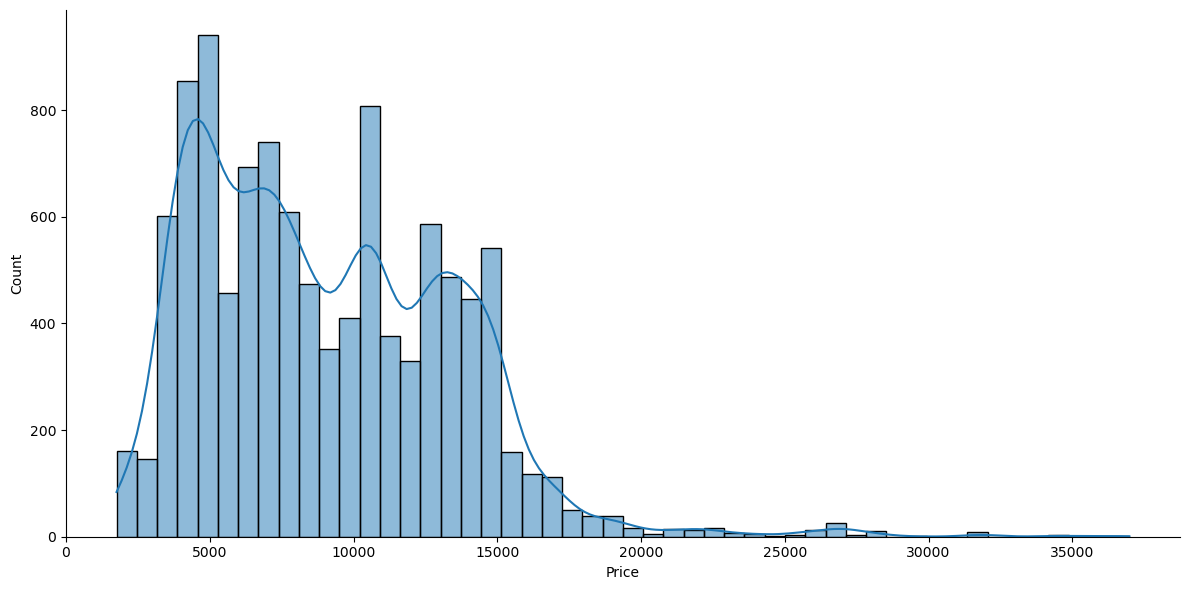

In [66]:
sns.displot(train_data['Price'], bins=50, aspect=2, height=6, kde=True)

In [64]:
train_data[train_data['Price']>40000]

,Total_Stops,Price,day_of_Journey,month_of_Journey,Dep_time_hr,Dep_time_minute,Arr_time_hr,Arr_time_,duration_hours,duration_minutes,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,durations_hours,Route_1,Route_2,Route_3,Route_4,Route_5
657,1,52229,3,1,5,45,10,45,5.0,0.0,...,0,0,0,1,5.0,0,7,8,13,5
1478,1,54826,18,3,18,40,0,45,6.0,5.0,...,0,0,0,1,6.0,0,7,8,13,5
2618,1,54826,18,3,22,50,5,5,6.0,15.0,...,0,0,0,1,6.0,0,7,8,13,5
2924,1,79512,3,1,5,45,11,25,5.0,40.0,...,0,0,0,1,5.0,0,7,8,13,5
5372,1,62427,3,1,5,45,12,25,6.0,40.0,...,0,0,0,1,6.0,0,7,8,13,5
5439,1,54826,3,1,16,55,23,0,6.0,5.0,...,0,0,0,1,6.0,0,7,8,13,5
7351,2,46490,3,3,20,5,4,25,8.0,20.0,...,0,0,0,0,8.0,3,1,4,5,5
9715,2,52285,3,6,20,5,4,25,8.0,20.0,...,0,0,0,0,8.0,3,1,4,5,5
10364,1,57209,3,1,9,45,14,25,4.0,40.0,...,0,0,0,1,4.0,0,33,8,13,5


In [65]:
train_data['Price']=np.where(train_data['Price']>40000, train_data['Price'].median(), train_data['Price'])

In [67]:
X=train_data.drop('Price', axis=1)
Y=train_data['Price']
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.3)

In [78]:
def metrics(y_true, y_pred):
    print(f'MAE:', mean_absolute_error(y_true, y_pred))
    print(f'MSE:', mean_squared_error(y_true, y_pred))
    print(f'RMSE:', mean_squared_error(y_true, y_pred)**0.5)
    print(f'Explained Variance Score:', explained_variance_score(y_true, y_pred))

In [79]:
def accuracy(y_true, y_predictions):
    errors= abs(y_predictions-y_true)
    mape=100* np.mean(errors/y_true)
    accuracy_model=100-mape
    return accuracy_model

In [80]:
model_random_forest=RandomForestRegressor(n_estimators=500, min_samples_split=3)

In [81]:
model_random_forest.fit(X_train, Y_train)

RandomForestRegressor(min_samples_split=3, n_estimators=500)

In [82]:
predictions_random_forest=model_random_forest.predict(X_test)
metrics(Y_test, predictions_random_forest)

MAE: 1156.7714657536396
MSE: 3848448.464215476
RMSE: 1961.7462792663775
Explained Variance Score: 0.8028441594393259


In [84]:
accuracy(Y_test,predictions_random_forest) 

87.35882255915713

In [85]:
df=pd.DataFrame({'Actual':Y_test, 'Predicted':predictions_random_forest})
df

,Actual,Predicted
3522,4823.0,4865.893957
8477,7280.0,9098.623940
10602,11228.0,11175.090200
1036,7932.0,8935.863219
7929,6961.0,6935.177767
...,...,...
10241,13069.0,11444.359429
1989,8016.0,6387.132019
6511,7229.0,5443.414886
1228,13377.0,10372.158567


C:\Users\Techkno\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Techkno\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


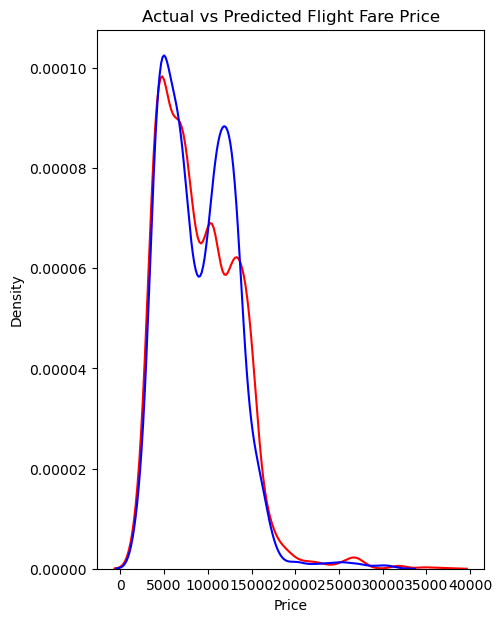

In [90]:
plt.figure(figsize=(5,7))
ax=sns.distplot(Y_test, hist=False, color="r", label="Actual_values")
sns.distplot(predictions_random_forest, hist=False, color="b", label="Actual_values", ax=ax)
plt.title('Actual vs Predicted Flight Fare Price')
plt.show()
plt.close()